<img src="../images/Peoplelogy-Logo.png" style="height: 150px;" align=left> <img src="../images/python-logo.png" style="height: 150px;" align=right>

# Customer Segmentation Analysis Project

<img src="../images/mall.jpg" style="height: 500px; width: 1500px;" align=left>
<br>

---
### Objective
Analyze customer demographics and spending behavior using descriptive statistics, visualizations, and distribution analysis. The goal is to provide insights into customer segments and spending patterns, incorporating knowledge of central tendency, dispersion, and outlier analysis.

---

## Project Instructions
### Deliverables
- **Summary Report**: Summarize key findings for each question.
- **Visualizations**: Include all histograms, box plots, scatter plots, and bar charts created during the analysis.
- **Interpretations**: Provide written explanations for all analyses, including insights from central tendency, dispersion, and distribution analysis.


---
### 1. Basic Data Exploration

#### Q1: Load and explore the dataset.
- Display the first five rows of the dataset.
- Identify and list all columns along with their data types.

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 

In [253]:
# Read the data
mall_customers = pd.read_csv("../data/Mall_Customers.csv")

In [254]:
mall_customers.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
156,157,Male,37,78,1
145,146,Male,28,77,97
103,104,Male,26,62,55
85,86,Male,48,54,46
176,177,Male,58,88,15
33,34,Male,18,33,92
47,48,Female,27,40,47
37,38,Female,30,34,73
172,173,Male,36,87,10
62,63,Female,67,47,52


In [255]:
#Analyse the info of the data
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [256]:
#simplify the data, 
mall_customers['CustomerID'] = mall_customers['CustomerID'].astype('float16')
mall_customers['Gender'] = mall_customers['Gender'].astype('category')
mall_customers['Age'] = mall_customers['Age'].astype('float16')
mall_customers['Annual Income (k$)'] = mall_customers['Annual Income (k$)'].astype('float16')
mall_customers['Spending Score (1-100)'] = mall_customers['Spending Score (1-100)'].astype('float16')

In [257]:
#rename the annual income and spending score columns
#df.rename(columns={'old_column_name1': 'new_column_name1', 'old_column_name2': 'new_column_name2'}, inplace=True)

mall_customers.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

In [258]:
#Get the columns
mall_customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [259]:
#Describe the data
mall_customers.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000,200.00000,200.000000,200.000000
mean,100.500,38.84375,60.562500,50.187500
std,57.875,13.96875,26.265625,25.828125
min,1.000,18.00000,15.000000,1.000000
25%,50.750,28.75000,41.500000,34.750000
50%,100.500,36.00000,61.500000,50.000000
75%,150.250,49.00000,78.000000,73.000000
max,200.000,70.00000,137.000000,99.000000


#### Q2: Check for any missing values in the dataset. If there are any, note which columns are affected.



In [260]:
#Analyse the info of the data
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CustomerID      200 non-null    float16 
 1   Gender          200 non-null    category
 2   Age             200 non-null    float16 
 3   Annual Income   200 non-null    float16 
 4   Spending Score  200 non-null    float16 
dtypes: category(1), float16(4)
memory usage: 2.0 KB


<span style="color:green">Answer:</span> There is no null info in any of the rows, so no missing values detected

---

### 2. Descriptive Statistics

#### Q3: Calculate and interpret the following statistics for the **Age**, **Annual Income**, and **Spending Score** columns:
   - Mean
   - Median
   - Mode
   - Standard deviation


In [261]:
#Calculate mean, median, mode and standard deviation for all using describe
mall_customers.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000,200.00000,200.000000,200.000000
mean,100.500,38.84375,60.562500,50.187500
std,57.875,13.96875,26.265625,25.828125
min,1.000,18.00000,15.000000,1.000000
25%,50.750,28.75000,41.500000,34.750000
50%,100.500,36.00000,61.500000,50.000000
75%,150.250,49.00000,78.000000,73.000000
max,200.000,70.00000,137.000000,99.000000


In [262]:
from collections import Counter

In [263]:
#Manually calculate the mean, median, mode and standard deviation for age, annual income and spending score
age = (mall_customers['Age'])

print(f"""
Key Breakdown for Age among Mall Customers
The mean is {age.mean()}
The median is {age.median()}
The mode is {Counter(age).most_common(3)}
The standard devation is {age.std()}
The minimum is {age.min()}
The first quartile is {age.quantile(.25)}
The third quartile is {age.quantile(.75)}
The maximum is {age.max()}
The range is {age.max() - age.min()}
The IQR is {iqr(age)}
The lower fence is {age.quantile(.25) - 1.5 * iqr(age)}
The upper fence is {age.quantile(.75) + 1.5 * iqr(age)}
""")
print()

Annual_Income = (mall_customers['Annual Income'])
print(f"""
Key Breakdown for Annual Income among Mall Customers
The mean is {Annual_Income.mean()}
The median is {Annual_Income.median()}
The mode is {Counter(Annual_Income).most_common(3)}
The standard devation is {Annual_Income.std()}
The minimum is {Annual_Income.min()}
The first quartile is {Annual_Income.quantile(.25)}
The third quartile is {Annual_Income.quantile(.75)}
The maximum is {Annual_Income.max()}
The range is {Annual_Income.max() - Annual_Income.min()}
The IQR is {iqr(Annual_Income)}
The lower fence is {Annual_Income.quantile(.25) - 1.5 * iqr(Annual_Income)}
The upper fence is {Annual_Income.quantile(.75) + 1.5 * iqr(Annual_Income)}
""")
print()

Spending_Score = (mall_customers['Spending Score'])
print(f"""
Key Breakdown for Spending Score among Mall Customers
The mean is {Spending_Score.mean()}
The median is {Spending_Score.median()}
The mode is {Spending_Score.mode()}
The standard devation is {Spending_Score.std()}
The minimum is {Spending_Score.min()}
The first quartile is {Spending_Score.quantile(.25)}
The third quartile is {Spending_Score.quantile(.75)}
The maximum is {Spending_Score.max()}
The range is {Spending_Score.max() - Spending_Score.min()}
The IQR is {iqr(Spending_Score)}
The lower fence is {Spending_Score.quantile(.25) - 1.5 * iqr(Spending_Score)}
The upper fence is {Spending_Score.quantile(.75) + 1.5 * iqr(Spending_Score)}
""")


Key Breakdown for Age among Mall Customers
The mean is 38.84375
The median is 36.0
The mode is [(32.0, 11), (35.0, 9), (19.0, 8)]
The standard devation is 13.96875
The minimum is 18.0
The first quartile is 28.75
The third quartile is 49.0
The maximum is 70.0
The range is 52.0
The IQR is 20.25
The lower fence is -1.625
The upper fence is 79.375



Key Breakdown for Annual Income among Mall Customers
The mean is 60.5625
The median is 61.5
The mode is [(54.0, 12), (78.0, 12), (48.0, 6)]
The standard devation is 26.265625
The minimum is 15.0
The first quartile is 41.5
The third quartile is 78.0
The maximum is 137.0
The range is 122.0
The IQR is 36.5
The lower fence is -13.25
The upper fence is 132.75



Key Breakdown for Spending Score among Mall Customers
The mean is 50.1875
The median is 50.0
The mode is 0    42.0
Name: Spending Score, dtype: float16
The standard devation is 25.828125
The minimum is 1.0
The first quartile is 34.75
The third quartile is 73.0
The maximum is 99.0
The range

C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [264]:
#Mode for Spending Score among Mall Customers

def mode_man(Spending_Score):
    x = list(Spending_Score)
    
    # obtain unique values and their counts as a list of tuples
    value_counts = [(i, x.count(i)) for i in list(set(x))]
    
    # calculate the maximum count
    max_count = np.max([elem[1] for elem in value_counts])

    # Return the values of each unique value that appears as frequently as max_count
    values = [i[0] for i in value_counts if i[1] == max_count]
    return values, max_count

In [265]:
modes, frequency = mode_man(Spending_Score)
print("Mode(s):", modes)
print("Frequency:", frequency)

Mode(s): [42.0]
Frequency: 8


---

#### 3. Distribution Analysis

#### Q3(a): Examine the **Age** distribution using a histogram. Describe whether it appears normally distributed, skewed, or has any outliers.


Text(0.5, 1.0, 'Frequency of Age of Customers in the Mall')

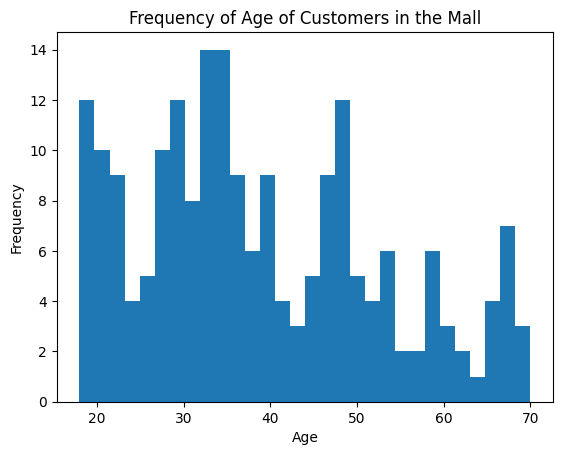

In [266]:
age = (mall_customers['Age'])

pd.Series(age ).plot.hist(bins = 30, xlabel='Age')
plt.title("Frequency of Age of Customers in the Mall") 

<span style="color:green">Answer:</span> Since the mean of age is 38 and median is 36, the mean is more than the median the data is positively skewed. There are no outliers, the above data fits under the lower fence and upper fence (The lower fence is -1.625, The upper fence is 79.375).

### Q3(b): Examine the **Annual Income** distribution using a histogram. Describe whether it appears normally distributed, skewed, or has any outliers.


Text(0.5, 1.0, 'Annual_Income of Customers in the Mall')

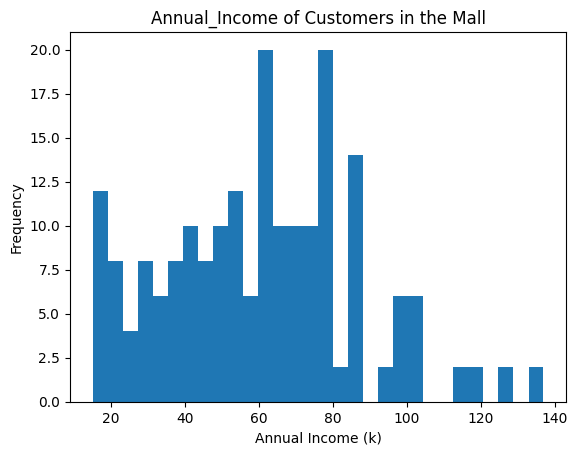

In [267]:
Annual_Income = (mall_customers['Annual Income'])

pd.Series(Annual_Income).plot.hist(bins = 30, xlabel='Annual Income (k)')
plt.title("Annual_Income of Customers in the Mall") 

<span style="color:green">Answer:</span> The mean of annual income is 60 and median is 61.5 and it's close togethher hence it is a normal distribution data but there are outliers and the upper fence is 132. And the hist plot shows that the data has a tail at the right hence it must be slightly positvely skewed.

#### Q5: Calculate the **skewness** and **kurtosis** for the **Annual Income** and **Spending Score** columns. Interpret the results.

---

In [268]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CustomerID      200 non-null    float16 
 1   Gender          200 non-null    category
 2   Age             200 non-null    float16 
 3   Annual Income   200 non-null    float16 
 4   Spending Score  200 non-null    float16 
dtypes: category(1), float16(4)
memory usage: 2.0 KB


In [269]:
mall_customers.head()

C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


In [282]:
#Convert data from float to int
mall_customers['Annual Income'] = pd.to_numeric(mall_customers['Annual Income'], downcast='integer')

In [271]:
#Calculate Skewness and Kurtosis of Annual Income among mall goers
Skewness = skew(mall_customers['Annual Income'])
Kurtosis = kurtosis(mall_customers['Annual Income'])

print (f'''
Skewness for Annual Income among mall goers is {Skewness}
and Kurtosis is {Kurtosis}.
''')


Skewness for Annual Income among mall goers is 0.319423684276314
and Kurtosis is -0.1258928297475106.



In [272]:
#Convert data from float to int
mall_customers['Spending Score'] = pd.to_numeric(mall_customers['Spending Score'], downcast='integer')

In [273]:
#Calculate Skewness and Kurtosis of Spending Score among mall goers
Skewness = skew(mall_customers['Spending Score'])
Kurtosis = kurtosis(mall_customers['Spending Score'])

print (f'''
Skewness for Spending Score among mall goers is {Skewness}
and Kurtosis is {Kurtosis}.
''')


Skewness for Spending Score among mall goers is -0.04686530945553505
and Kurtosis is -0.8359582718737237.



<span style="color:green">Answer:</span> 

**Key Findings for Annual Income of mall goers** <br>
The skewness for Annual Income of mall goers is positive and closer to 0, hence the data is skewed right and slightly symmetric . And the kusrtosis for Annual Income of mall goers is negative, meaning the distribution is platykurtic.

**Key Findings for Spending Score of mall goers** <br>
The skewness for Spending Score of mall goers is negative and very close to 0, hence the data is normally distributed. And the kusrtosis for Spending Score of mall goers is negative, meaning the distribution is platykurtic.

### 4. Exploring Relationships Between Variables

#### Q6: Use a **box plot** to compare the **Spending Score** distribution for **Male** and **Female** customers. What can you infer about the spending patterns?


In [274]:
mall_customers.head()

C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1.0,Male,19.0,15,39
1,2.0,Male,21.0,15,81
2,3.0,Female,20.0,16,6
3,4.0,Female,23.0,16,77
4,5.0,Female,31.0,17,40


Text(0.5, 1.0, 'Spending Score by Gender of Mall Goers')

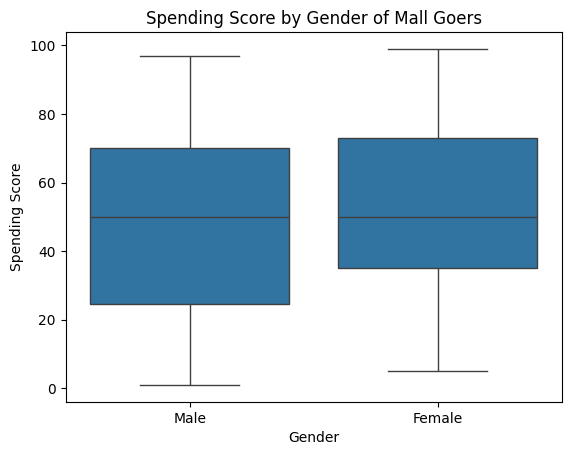

In [275]:
sns.boxplot(x = "Gender", y = "Spending Score", data = mall_customers, order=('Male', 'Female')).set_title("Spending Score by Gender of Mall Goers")

<span style="color:green">Answer:</span> 

**Key Findings for Spending Score of mall goers by Gender** <br>
Based on the box plot I can infer that the mean of expenditure between men and women are the same, but women spend range is slightly bigger than men since the lower fence and upper hence is slightly higher than man.  

#### Q7: Use a **scatter plot** to examine the relationship between **Annual Income** and **Spending Score**. Calculate the Pearson correlation coefficient and interpret the relationship.


Text(0.5, 0.98, 'Relationship between Annual Income and Speding Score of Mall Goers')

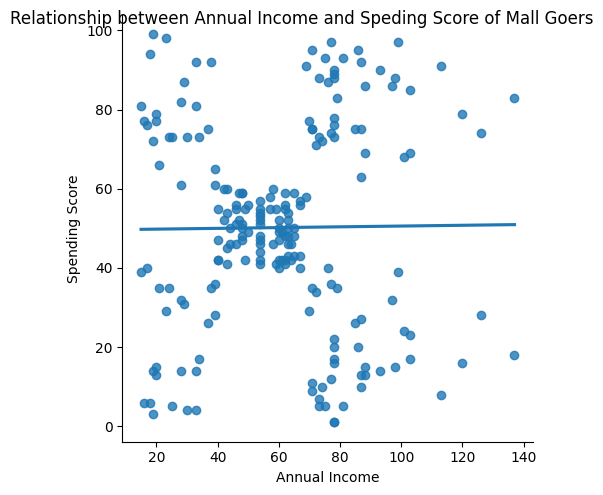

In [276]:
sns.lmplot(x = "Annual Income", y = "Spending Score", data = mall_customers, 
            ci = False).fig.suptitle("Relationship between Annual Income and Speding Score of Mall Goers")

In [277]:
#Pearson Correlation Coefficient
np.corrcoef(mall_customers.loc[:, "Annual Income"], mall_customers.loc[:, "Spending Score"])

array([[1.        , 0.00990285],
       [0.00990285, 1.        ]])

<span style="color:green">Answer:</span> 

**Relationship between Annual Income and Spending Score of Mall Goers** <br>
Based on the scatter plot I can infer that the results are scattered and there is no correlation between the two variables.

---


### 5. Outlier Detection

#### Q8: Calculate the following for the **Age** and **Annual Income** columns:
   - Q1 (25th percentile)
   - Q3 (75th percentile)
   - Interquartile Range (IQR)
   - Lower Fence (LF)
   - Upper Fence (UF)

   Identify any outliers based on these values.


In [278]:
#Outlier Findings for Age Column
x =  mall_customers.loc[:, "Age"]
manual_range = lambda x : x.max() - x.min()
Q1 = lambda x : x.quantile(.25)
Q3 = lambda x : x.quantile(.75)
IQR = lambda x: iqr(x, axis=0)
LF = lambda x : Q1(x) - 1.5 * IQR(x)
UF= lambda x : Q3(x) + 1.5 * IQR(x)
count_outliers = lambda x : np.sum((x < LF(x)) | (x> UF(x)))

#Name the lambda functions
manual_range.__name__ ="Range"
Q1.__name__ = "Q1"
Q3.__name__ = "Q3"
IQR.__name__ = "IQR"
LF.__name__ ='Lower Limit'
UF.__name__ = 'Upper Limit'
count_outliers.__name__ ='Outliers'

#Print the function values
results = pd.DataFrame({
    'Statistics': ['Range', 'Q1', 'Q3', 'IQR', 'Lower Limit', 'Upper Limit', 'Outliers'],
    'Values': [
        manual_range(x),
        Q1(x),
        Q3(x),
        IQR(x),
        LF(x),
        UF(x),
        count_outliers(x)
    ]
})

print ("Outlier Findings for Age Column")
print (results)

Outlier Findings for Age Column
    Statistics  Values
0        Range  52.000
1           Q1  28.750
2           Q3  49.000
3          IQR  20.250
4  Lower Limit  -1.625
5  Upper Limit  79.375
6     Outliers   0.000


In [279]:
#Outlier Findings for Annual Income
x =  mall_customers.loc[:, "Annual Income"]
manual_range = lambda x : x.max() - x.min()
Q1 = lambda x : x.quantile(.25)
Q3 = lambda x : x.quantile(.75)
IQR = lambda x: iqr(x, axis=0)
LF = lambda x : Q1(x) - 1.5 * IQR(x)
UF= lambda x : Q3(x) + 1.5 * IQR(x)
count_outliers = lambda x : np.sum((x < LF(x)) | (x> UF(x)))

#Name the lambda functions
manual_range.__name__ ="Range"
Q1.__name__ = "Q1"
Q3.__name__ = "Q3"
IQR.__name__ = "IQR"
LF.__name__ ='Lower Limit'
UF.__name__ = 'Upper Limit'
count_outliers.__name__ ='Outliers'

results = pd.DataFrame({
    'Statistics': ['Range', 'Q1', 'Q3', 'IQR', 'Lower Limit', 'Upper Limit', 'Outliers'],
    'Values': [
        manual_range(x),
        Q1(x),
        Q3(x),
        IQR(x),
        LF(x),
        UF(x),
        count_outliers(x)
    ]
})

print ("Outlier Findings for Annual Income Column")
print (results)

Outlier Findings for Annual Income Column
    Statistics  Values
0        Range  122.00
1           Q1   41.50
2           Q3   78.00
3          IQR   36.50
4  Lower Limit  -13.25
5  Upper Limit  132.75
6     Outliers    2.00


<span style="color:green">Answer:</span> 

**Outliers for Age** <br>
There are 0 outliers for Age column.

**Outliers for Annual Income** <br>
There are 2 outliers for Annual Income, anything after 132.75 is an outlier.

---

### 6. Customer Segmentation Analysis

#### Q9: Group customers by **Age Group** (e.g., <20, 20-30, 30-40, etc.) and calculate the mean **Spending Score** for each group. Visualize the results in a bar chart.

   - **Hint**: Use `pd.cut()` to create age groups, and then `groupby()` to calculate average values.

In [280]:
mall_customers.head()

C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1.0,Male,19.0,15,39
1,2.0,Male,21.0,15,81
2,3.0,Female,20.0,16,6
3,4.0,Female,23.0,16,77
4,5.0,Female,31.0,17,40


In [284]:
mall_customers['Age'] = mall_customers['Age'].astype('int')

In [285]:
#create Age Group columns
mall_customers['Age_Group'] = pd.cut(mall_customers['Age'], bins=[0, 20, 30, 40, 50, 60, np.inf], labels=['Less than 20', '20-30', '30-40', '40-50', '50-60', '60 and above'])
mall_customers

C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,CustomerID,Gender,Age,Annual Income,Spending Score,Age_Group
0,1.0,Male,19,15,39,Less than 20
1,2.0,Male,21,15,81,20-30
2,3.0,Female,20,16,6,Less than 20
3,4.0,Female,23,16,77,20-30
4,5.0,Female,31,17,40,30-40
...,...,...,...,...,...,...
195,196.0,Female,35,120,79,30-40
196,197.0,Female,45,126,28,40-50
197,198.0,Male,32,126,74,30-40
198,199.0,Male,32,137,18,30-40


In [286]:
mall_customers.groupby('Age_Group')['Spending Score'].mean().reset_index()

C:\Users\aiswa\AppData\Local\Temp\ipykernel_12156\2449352355.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mall_customers.groupby('Age_Group')['Spending Score'].mean().reset_index()


,Age_Group,Spending Score
0,Less than 20,44.647059
1,20-30,67.222222
2,30-40,57.500000
3,40-50,34.394737
4,50-60,32.521739
5,60 and above,44.176471


<span style="color:green">Answer:</span> 

**Inference from above Age Group Data** <br>
20 to 30 year olds has the highest spending score, and the lowest is 4o to 60 year old people. This might be because the 40 to 60 have family commitments because this number increases again in their 60's.

---


### 10. Examine Gender-Based Spending Habits
   - **Question**: Calculate the average **Spending Score** and **Annual Income** for each gender. Does one gender tend to spend more on average?
   - **Hint**: Use `groupby()` on the gender column 


In [287]:
mall_customers.head()

C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,CustomerID,Gender,Age,Annual Income,Spending Score,Age_Group
0,1.0,Male,19,15,39,Less than 20
1,2.0,Male,21,15,81,20-30
2,3.0,Female,20,16,6,Less than 20
3,4.0,Female,23,16,77,20-30
4,5.0,Female,31,17,40,30-40


In [288]:
#Average Spending Score and Annual Income based of Gender
mall_customers.groupby('Gender')['Spending Score'].mean().reset_index()

C:\Users\aiswa\AppData\Local\Temp\ipykernel_12156\1041123869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mall_customers.groupby('Gender')['Spending Score'].mean().reset_index()


,Gender,Spending Score
0,Female,51.526786
1,Male,48.511364


<span style="color:green">Answer:</span> 

**Inference from above Gender Group Data** <br>
Females tend to spend slightly higher than men but not a big difference.


### 11. Calculate Z-scores for Spending Score
   - **Question**: Calculate the Z-scores for the **Spending Score** column to identify which customers have exceptionally high or low spending scores. Highlight any customers with Z-scores greater than 2 or less than -2.
   - **Hint**: Z-score can be calculated as `(value - mean) / std`.

Key Breakdown for Spending Score among Mall Customers
The mean is 50.1875
The median is 50.0
The mode is 0    42.0
Name: Spending Score, dtype: float16
The standard devation is 25.828125
The minimum is 1.0
The first quartile is 34.75
The third quartile is 73.0
The maximum is 99.0
The range is 98.0
The IQR is 38.25
The lower fence is -22.625
The upper fence is 130.375

In [290]:
# Calculate the Z-score for 2
Spending_Score_Mean = 50.1875
Spending_Score_STD = 25.828125

x= 2
Z= (x - Spending_Score_Mean) / Spending_Score_STD

print(f"The Z-score for x = {x} is: {Z:.2f}")

The Z-score for x = 2 is: -1.87


In [291]:
# Calculate the Z-score for -2
Spending_Score_Mean = 50
Spending_Score_STD = 25

x= -2
Z= (x - Spending_Score_Mean) / Spending_Score_STD

print(f"The Z-score for x = {x} is: {Z:.2f}")

The Z-score for x = -2 is: -2.08


In [292]:
#Highlight customers with greater than 2 or less than -2 spending score

# Calculate Z-scores
mall_customers['ZScore'] = (mall_customers['Spending Score'] - Spending_Score_Mean) / Spending_Score_STD

# Filter customers with Z-scores greater than 2 or less than -2
highlighted_customers = mall_customers[(mall_customers['ZScore'] > -1.92) | (mall_customers['ZScore'] < -2.08)]

# Print highlighted customers
print("Customers with Z-scores greater than 2 or less than -2:")
highlighted_customers

Customers with Z-scores greater than 2 or less than -2:


C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,CustomerID,Gender,Age,Annual Income,Spending Score,Age_Group,ZScore
0,1.0,Male,19,15,39,Less than 20,-0.44
1,2.0,Male,21,15,81,20-30,1.24
2,3.0,Female,20,16,6,Less than 20,-1.76
3,4.0,Female,23,16,77,20-30,1.08
4,5.0,Female,31,17,40,30-40,-0.40
...,...,...,...,...,...,...,...
195,196.0,Female,35,120,79,30-40,1.16
196,197.0,Female,45,126,28,40-50,-0.88
197,198.0,Male,32,126,74,30-40,0.96
198,199.0,Male,32,137,18,30-40,-1.28


In [293]:
len(highlighted_customers)

198

<span style="color:green">Answer:</span> 

**Inference from above Z score** <br>
198 people have a z-score greater than -2 and 2.


### 12. Cluster Analysis Preparation (Optional)
   - **Question**: Use the Age and Annual Income columns to create basic clusters (e.g., Low Income/Young Age, High Income/Older Age). Categorize each customer based on these clusters.
   - **Hint**: You can use `pd.cut()` for age ranges and income ranges, and then combine them to create clusters.


In [294]:
#create Age Group columns, Young Age=0-30, Older Age>30
mall_customers['Age_Cluster'] = pd.cut(mall_customers['Age'], bins=[0,40, np.inf], labels=['Young Age', 'Old Age'])
mall_customers

C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,CustomerID,Gender,Age,Annual Income,Spending Score,Age_Group,ZScore,Age_Cluster
0,1.0,Male,19,15,39,Less than 20,-0.44,Young Age
1,2.0,Male,21,15,81,20-30,1.24,Young Age
2,3.0,Female,20,16,6,Less than 20,-1.76,Young Age
3,4.0,Female,23,16,77,20-30,1.08,Young Age
4,5.0,Female,31,17,40,30-40,-0.40,Young Age
...,...,...,...,...,...,...,...,...
195,196.0,Female,35,120,79,30-40,1.16,Young Age
196,197.0,Female,45,126,28,40-50,-0.88,Old Age
197,198.0,Male,32,126,74,30-40,0.96,Young Age
198,199.0,Male,32,137,18,30-40,-1.28,Young Age


In [295]:
#create Income Group columns, Low Income=0-70, High Income>70
mall_customers['Income_Cluster'] = pd.cut(mall_customers['Annual Income'], bins=[0,70, np.inf], labels=['Low Income', 'High Income'])
mall_customers

C:\Users\aiswa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,CustomerID,Gender,Age,Annual Income,Spending Score,Age_Group,ZScore,Age_Cluster,Income_Cluster
0,1.0,Male,19,15,39,Less than 20,-0.44,Young Age,Low Income
1,2.0,Male,21,15,81,20-30,1.24,Young Age,Low Income
2,3.0,Female,20,16,6,Less than 20,-1.76,Young Age,Low Income
3,4.0,Female,23,16,77,20-30,1.08,Young Age,Low Income
4,5.0,Female,31,17,40,30-40,-0.40,Young Age,Low Income
...,...,...,...,...,...,...,...,...,...
195,196.0,Female,35,120,79,30-40,1.16,Young Age,High Income
196,197.0,Female,45,126,28,40-50,-0.88,Old Age,High Income
197,198.0,Male,32,126,74,30-40,0.96,Young Age,High Income
198,199.0,Male,32,137,18,30-40,-1.28,Young Age,High Income


In [296]:
mall_customers.groupby(['Age_Cluster', 'Income_Cluster']).size().reset_index(name='Count')

C:\Users\aiswa\AppData\Local\Temp\ipykernel_12156\697036197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mall_customers.groupby(['Age_Cluster', 'Income_Cluster']).size().reset_index(name='Count')


,Age_Cluster,Income_Cluster,Count
0,Young Age,Low Income,69
1,Young Age,High Income,53
2,Old Age,Low Income,57
3,Old Age,High Income,21


<span style="color:green">Answer:</span> 

**Inference for Age Cluster and Income Cluster** <br>
Young people (Age below 40) with high income is slightly less than Young people (Age below 40) with low income. There's not a big difference here.<br>
<br>
Old people (Age above 40) with high income is aignificantly less than Old people (Age above 40) with low income.


### 13. Calculate and Interpret Percentiles
   - **Question**: Calculate the 25th, 50th, and 75th percentiles for the **Spending Score** and **Annual Income** columns. What insights can you gain from these percentiles?
   - **Hint**: Use `np.percentile()` or `df.quantile()` to get these values for each column.


In [297]:
mall_customers.dtypes

CustomerID         float16
Gender            category
Age                  int64
Annual Income        int16
Spending Score        int8
Age_Group         category
ZScore             float64
Age_Cluster       category
Income_Cluster    category
dtype: object

In [298]:
#25th, 50th, and 75th percentiles for the Spending Score

x= mall_customers['Spending Score']
print(f"""
The first quartile is {x.quantile(.25)}
The second quartile is {x.quantile(.50)}
The third quartile is {x.quantile(.75)}
""")


The first quartile is 34.75
The second quartile is 50.0
The third quartile is 73.0



In [299]:
#25th, 50th, and 75th percentiles for the Annual Income

y = mall_customers['Annual Income']
print(f"""
The first quartile is {y.quantile(.25)}
The second quartile is {y.quantile(.50)}
The third quartile is {y.quantile(.75)}
""")


The first quartile is 41.5
The second quartile is 61.5
The third quartile is 78.0



<span style="color:green">Answer:</span> 

**Inference for Spending Score** <br>
At a given time, 25% of people spend 35 when the visit the mall, 50% spend 50 and 75% spend 73.<br>
<br>
**Inference for Annual Income** <br>
At a given time, 25% of people earn an annual income of 41k, 50% earn 61.5k and 75% earn 78k.


### 14. Visualize Spending Score Distribution by Gender and Age Group
   - **Question**: Create a box plot to show **Spending Score** distribution across both gender and age groups. Which group has the highest variability in spending?
   - **Hint**: Use `sns.boxplot()` with `x='Age Group'`, `y='Spending Score'`, and `hue='Gender'` if using Seaborn.

**Box Plot for Spending Score for Age Group and Gender**

Text(0.5, 1.0, 'Spending Score distribution across both gender and age groups')

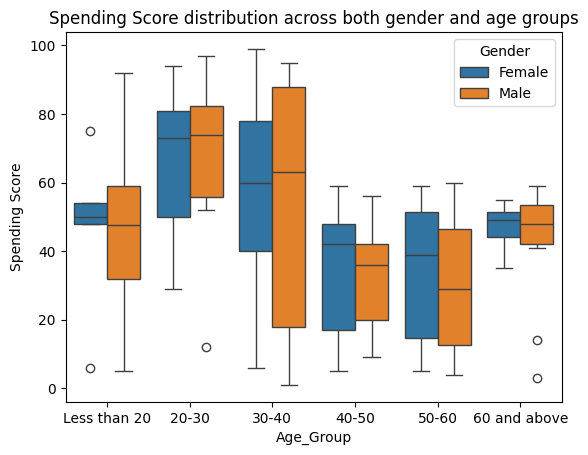

In [300]:
sns.boxplot(x='Age_Group', y='Spending Score', hue='Gender', data=mall_customers).set_title("Spending Score distribution across both gender and age groups")

<span style="color:green">Answer:</span> 

**Inference for Spending Score by age group and gender** <br>
The spending score is highest among women in their 30s and 40s, as well as among individuals under 20. Notably, the largest disparity in expenditure between men and women occurs in these age groups, as well as among those aged 60 and above. Interestingly, men tend to spend more than women during their 40s and 50s. This revision enhances clarity and flow while maintaining the original

**Bar Plot for Mean Spending Score for Age Group and Gender**

In [301]:
# Create a new DataFrame for plotting
mall_customer_tab = mall_customers[['Age_Group', 'Spending Score', 'Gender']]

# Grouping data by Age Group and Gender to calculate average Spending Score
grouped_data = mall_customer_tab.groupby(['Age_Group', 'Gender']).mean().reset_index()

segmented_data = grouped_data.pivot(index='Age_Group', columns='Gender', values='Spending Score')
segmented_data

C:\Users\aiswa\AppData\Local\Temp\ipykernel_12156\1046217524.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = mall_customer_tab.groupby(['Age_Group', 'Gender']).mean().reset_index()


Gender,Female,Male
Age_Group,,
Less than 20,46.600000,43.833333
20-30,65.517241,70.312500
30-40,58.714286,55.800000
40-50,35.160000,32.923077
50-60,35.083333,29.727273
60 and above,47.166667,42.545455


**Bar Plot for Spending Score for Age Group and Gender**

<Axes: title={'center': 'Average Spending Score by Age Group and Gender'}, xlabel='Age_Group'>

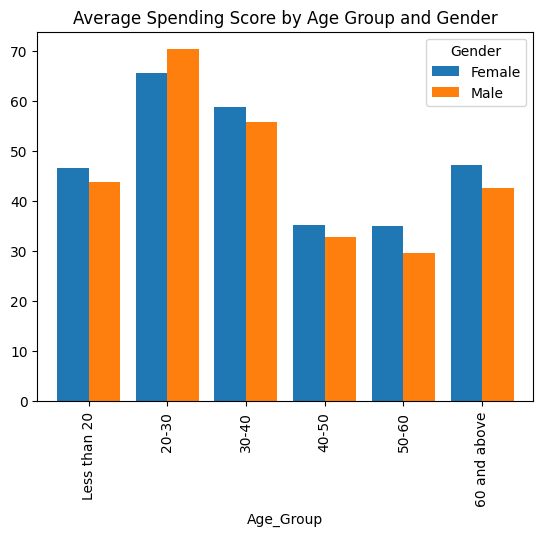

In [302]:
segmented_data.plot.bar(title="Average Spending Score by Age Group and Gender", width=0.8)

<span style="color:green">Answer:</span> 

**Inference for Mean Spending Score by age group and gender** <br>
The mean spending score is highest among individuals in their 20s and 30s, showing a decline thereafter, with a slight increase again for those aged 60 and above. This trend suggests that spending power peaks during the 20s and 30s, likely due to fewer financial commitments at that stage of life. For individuals aged 60 and above, the increase in spending may be attributed to financial support from working children, which is common in Malaysian family structures where children often provide monthly allowances to their parents.<br>
<br>
To capitalize on these insights, malls could implement initiatives aimed at attracting these two demographic groups, creating activities and promotions that encourage increased foot traffic from both younger adults and seniors. <br>

**Pair Plot for Spending Score for Gender and Age**

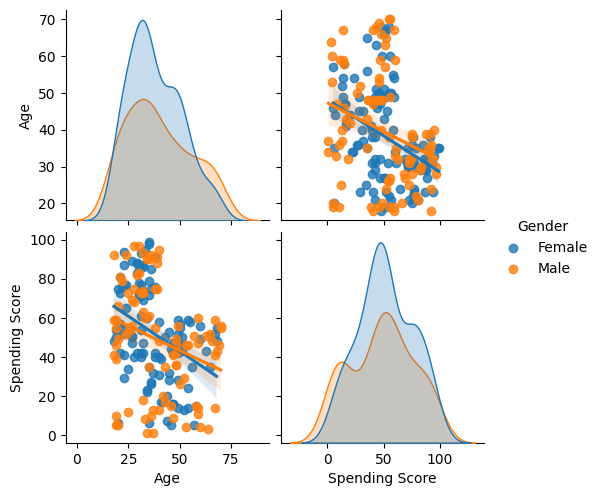

In [303]:
sns.pairplot(mall_customers, hue='Gender', vars=["Age", "Spending Score"], kind='reg')

<span style="color:green">Answer:</span> 

**Inference for Spending Score by age group and gender for pair plot** <br>
The downward slope of the line indicates a negative relationship between age and spending score, meaning that as age increases, the spending score tends to decrease. Notably, the line for females is steeper than that for males, suggesting a stronger correlation between age and spending score for women. This may be attributed to factors such as the "pink tax," where products marketed toward women often carry higher prices. Additionally, malls typically offer a wider range of goods targeted at female consumers, which could further influence spending patterns. <br>

**Pair Plot for Spending Score for All Variables**

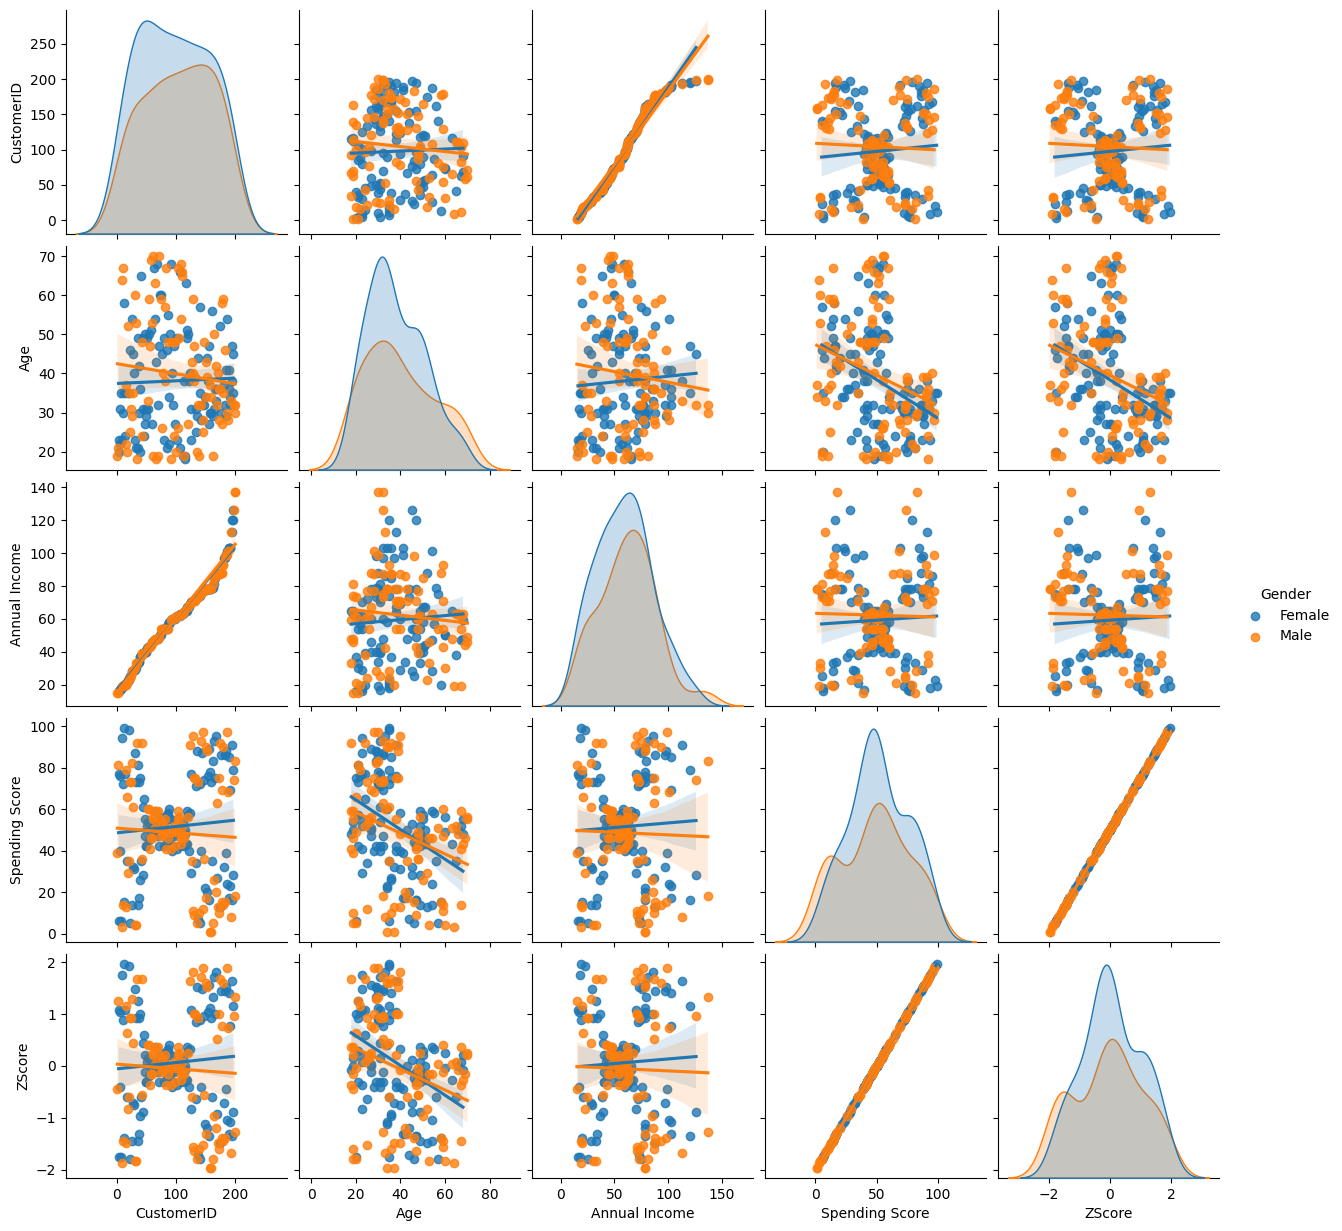

In [305]:
sns.pairplot(mall_customers, hue='Gender', kind='reg')